In [ ]:
pip install lazypredict

In [ ]:
import pandas as pd
import numpy as np

from scipy import stats

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OrdinalEncoder


from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv("/content/Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.00
1,4,82,No,4,2,65.00
2,8,51,Yes,7,2,45.00
3,5,52,Yes,5,2,36.00
4,7,75,No,8,5,66.00
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.00
9996,7,64,Yes,8,5,58.00
9997,6,83,Yes,8,5,74.00
9998,9,97,Yes,7,0,95.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4.99,69.45,6.53,4.58,55.22
std,2.59,17.34,1.70,2.87,19.21
min,1.00,40.00,4.00,0.00,10.00
25%,3.00,54.00,5.00,2.00,40.00
50%,5.00,69.00,7.00,5.00,55.00
75%,7.00,85.00,8.00,7.00,71.00
max,9.00,99.00,9.00,9.00,100.00


In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
df.duplicated().sum()

127

In [ ]:
for column in df.columns:
  print(column,":",df[column].unique())
  print("____________")

Hours Studied : [7 4 8 5 3 6 2 1 9]
____________
Previous Scores : [99 82 51 52 75 78 73 45 77 89 91 79 47 72 83 54 96 74 85 61 62 84 94 90
 44 70 67 97 59 55 68 63 46 76 43 81 93 98 48 92 64 88 60 87 40 69 80 95
 49 50 53 71 56 58 66 65 57 41 42 86]
____________
Extracurricular Activities : ['Yes' 'No']
____________
Sleep Hours : [9 4 7 5 8 6]
____________
Sample Question Papers Practiced : [1 2 5 6 0 8 3 4 9 7]
____________
Performance Index : [ 91.  65.  45.  36.  66.  61.  63.  42.  69.  84.  73.  27.  33.  68.
  43.  67.  70.  30.  71.  85.  57.  35.  49.  83.  74.  39.  58.  47.
  60.  32.  64.  54.  17.  53.  75.  52.  78.  38.  98.  87.  41.  81.
  15.  88.  95.  29.  21.  76.  25.  34.  50.  56.  82.  23.  46.  92.
  77.  86.  44.  94.  40. 100.  31.  26.  18.  51.  72.  16.  28.  89.
  48.  37.  62.  59.  19.  79.  22.  10.  90.  80.  24.  20.  96.  55.
  97.  12.  93.  14.  99.  11.  13.]
____________


In [ ]:
df.drop_duplicates(inplace=True)

**The given dataset is supervised Regressor Dataset **

In [ ]:
continus_column=['Hours Studied','Sample Question Papers Practiced', 'Performance Index']
category_column=['Previous Scores','Sleep Hours','Extracurricular Activities']

**Hypothesis Testing**

In [ ]:
def central_limit_theorem(continous_column,sample_size,rage):
  result_centrallimit={}
  pop=df[continous_column].values
  population_mean=pop.mean()
  allsample=[]
  for i in range(rage):
     sample=np.random.choice(pop,sample_size)
     allsample.append(sample.mean())
  all_sample_mean=(np.mean(allsample))
  result_centrallimit.update({'Column Name':continous_column,
                       'Population mean':population_mean,
                       'Allsample mean':all_sample_mean
                       })
  if continous_column:
    H0_accepted=0
    H0_rejected=0
    for i in range(rage):
      sample1=df[continous_column].sample(frac=0.04)
      t_test,p_value=stats.ttest_1samp(sample1,df[continous_column].mean())
      if p_value<0.05:
        H0_rejected+=1
      else:
        H0_accepted+=1
      if H0_accepted>H0_rejected:
        result_centrallimit.update({'Onesamplettest':' H0-There is no significant difference','Ttest':t_test,
                                    'pvalue':p_value})
      else:
        result_centrallimit.update({'Onesamplettest':' Ha-There is significant difference','Ttest':t_test,'pvalue':p_value})
    return(result_centrallimit)

In [ ]:
res=[]
for i in continus_column:
  s=central_limit_theorem(i,50,10)
  res.append(s)
pd.DataFrame(res)


,Column Name,Population mean,Allsample mean,Onesamplettest,Ttest,pvalue
0,Hours Studied,4.99,5.22,H0-There is no significant difference,-1.54,0.12
1,Sample Question Papers Practiced,4.58,4.59,H0-There is no significant difference,0.67,0.50
2,Performance Index,55.22,55.56,H0-There is no significant difference,0.12,0.90


In [ ]:
def twosamplettest(continous_column1,continous_column2,sample_size,rage):
   H0_accepted=0
   H0_rejected=0
   result={}
   allsample1=[]
   allsample2=[]
   for i in range(rage):
     sample1=df[continous_column1].sample(frac=0.2)
     sample2=df[continous_column2].sample(frac=0.2)
     t_test,p_value=stats.ttest_ind(sample1,sample2)
     if p_value<0.05:
        H0_rejected+=1
     else:
        H0_accepted+=1
     if H0_accepted>H0_rejected:
         result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest':'H0-There is no significant difference',
             't_test_value':t_test,
              'P_value':p_value})
     else:
         result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest':' Ha-There is significant difference',
              't_test_value':t_test,
              'P_value':p_value})
   if continous_column1:
     H0_accepted=0
     H0_rejected=0
     for i in range(rage):
         column1=df[continous_column1]
         column2=df[continous_column2]
         sample1=np.random.choice(column1,sample_size)
         sample2=np.random.choice(column2,sample_size)
         allsample1.append(sample1.mean())
         allsample2.append(sample2.mean())
     t_test,p_value=stats.ttest_ind(allsample1,allsample2)
     if p_value<0.05:
              H0_rejected+=1
     else:
            H0_accepted+=1
     if H0_accepted>H0_rejected:
              result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':'H0-There is no significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})
     else:
              result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':' Ha-There is significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})

   return result

In [ ]:
columns=continus_column
res1=[]
for i in range (len(columns)-1):
  column1=columns[i]
  for j in range(i+1,len(columns)):
      column2=columns[j]
      j=twosamplettest(column1,column2,50,10)
      res1.append(j)
pd.DataFrame(res1)

,column,twosamplettest,t_test_value,P_value,twosamplettest central,t_test_valuone,P_valueone
0,Hours Studied&Sample Question Papers Practiced,Ha-There is significant difference,4.11,0.00,Ha-There is significant difference,4.21,0.00
1,Hours Studied&Performance Index,Ha-There is significant difference,-115.97,0.00,Ha-There is significant difference,-46.55,0.00
2,Sample Question Papers Practiced&Performance I...,Ha-There is significant difference,-117.54,0.00,Ha-There is significant difference,-39.65,0.00


In [ ]:
def chi_square_test(category_column1,category_column2):
  result={}
  H0_accepted=0
  H0_rejected=0
  data1=pd.crosstab(df[category_column1],df[category_column2])
  observed_values=data1.values
  value=stats.chi2_contingency(observed_values)
  p_value=value[1]
  if p_value<0.05:
     H0_rejected+=1
  else:
    H0_accepted+=1
  if H0_accepted>H0_rejected:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "H0-There is no relationship between two mentioned column" })
  else:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "Ha-There is relationship between two mentioned column" })

  return result

In [ ]:
Category=category_column
res2=[]
for i in range(len(Category)-1):
  category1=Category[i]
  for j in range(i+1,len(Category)):
      category2=Category[j]
      chi=chi_square_test(category1,category2)
      res2.append(chi)
pd.set_option('max_colwidth', None)
pd.DataFrame(res2)

,column,chi_square_test
0,Previous Scores&Sleep Hours,H0-There is no relationship between two mentioned column
1,Previous Scores&Extracurricular Activities,H0-There is no relationship between two mentioned column
2,Sleep Hours&Extracurricular Activities,H0-There is no relationship between two mentioned column


In [ ]:
def annova_test(continous_column,category_column):
   result={}
   H0_accepted=0
   H0_rejected=0
   group=df[category_column].unique()
   grp={}
   for i in group:
     grp[i]=df[continous_column][df[category_column]==i]
   f_value,p_value=stats.f_oneway(*grp.values())
   if p_value<0.05:
    H0_rejected+=1
   else:
     H0_accepted+=1
   if H0_accepted>H0_rejected:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is relationship between mentioned column"})
   else:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is no relationship between mentioned column"})

   return result

In [ ]:
Category=category_column
continous=continus_column
res3=[]
for i in continous:
  for j in Category:
    ann=annova_test(i,j)
    res3.append(ann)
pd.DataFrame(res3)

,column,Annova_test
0,Hours Studied&Previous Scores,There is relationship between mentioned column
1,Hours Studied&Sleep Hours,There is relationship between mentioned column
2,Hours Studied&Extracurricular Activities,There is relationship between mentioned column
3,Sample Question Papers Practiced&Previous Scores,There is relationship between mentioned column
4,Sample Question Papers Practiced&Sleep Hours,There is relationship between mentioned column
5,Sample Question Papers Practiced&Extracurricular Activities,There is relationship between mentioned column
6,Performance Index&Previous Scores,There is no relationship between mentioned column
7,Performance Index&Sleep Hours,There is no relationship between mentioned column
8,Performance Index&Extracurricular Activities,There is no relationship between mentioned column


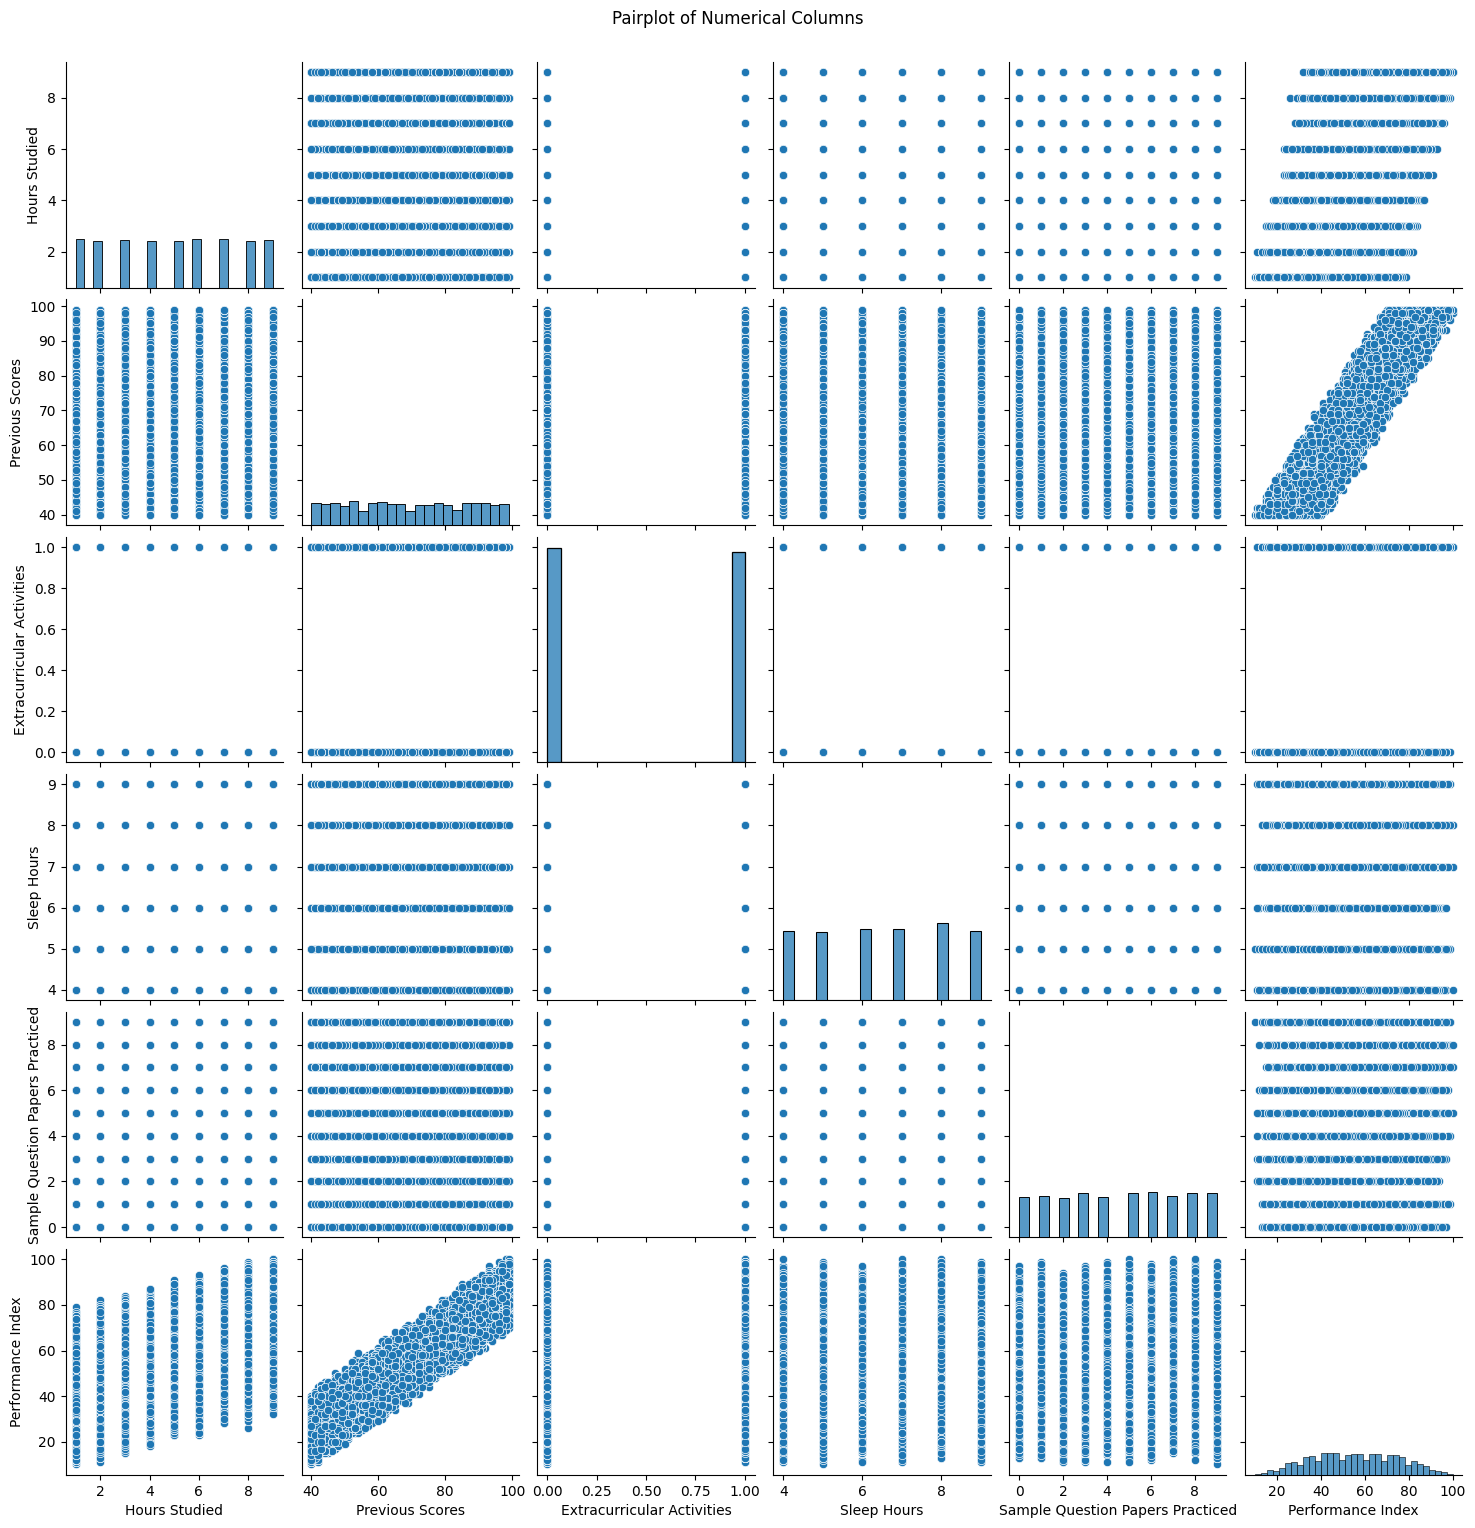

In [ ]:
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

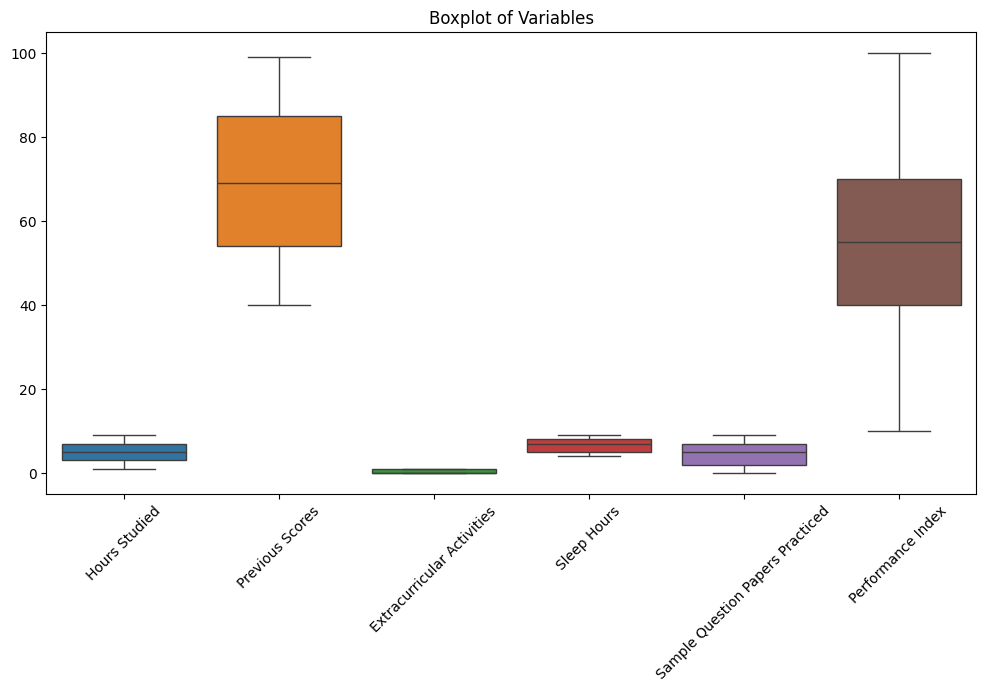

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Variables')
plt.xticks(rotation=45)
plt.show()


In [ ]:
encode=OrdinalEncoder()
df['Extracurricular Activities']=encode.fit_transform(df[['Extracurricular Activities']])

In [ ]:
x=df.drop('Performance Index',axis=1)
y=df['Performance Index']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(x_train, x_test, y_train, y_test)
models

 74%|███████▍  | 31/42 [00:49<00:11,  1.07s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:55<00:00,  1.31s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 7404, number of used features: 5
[LightGBM] [Info] Start training from score 55.297542


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Ridge,0.99,0.99,2.05,0.02
RidgeCV,0.99,0.99,2.05,0.03
BayesianRidge,0.99,0.99,2.05,0.05
LassoLarsIC,0.99,0.99,2.05,0.03
LarsCV,0.99,0.99,2.05,0.03
RANSACRegressor,0.99,0.99,2.05,0.03
OrthogonalMatchingPursuitCV,0.99,0.99,2.05,0.03
LassoLarsCV,0.99,0.99,2.05,0.03
Lars,0.99,0.99,2.05,0.03


In [ ]:
 #Gradient Boosting Regressor
model=GradientBoostingRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)


In [ ]:
y_pred

array([78.54965929, 39.48217527, 76.27037256, ..., 44.81957167,
       55.92193655, 65.53559281])

In [ ]:
model_1=AdaBoostRegressor().fit(x_train,y_train)
y_pred_1=model_1.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2


(4.351860691719807, 0.9881189045065649)

In [ ]:
mse = mean_squared_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_1)
mse, r2

(8.18933355408219, 0.9776421487551819)